In [43]:
## Shravani.P.Deshpande NLP Experiment 1


In [44]:
# Install NLTK
!pip install nltk


In [45]:
import nltk
import string
import re
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from nltk import pos_tag
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
#PART A: TEXT PROCESSING ON A SENTENCE
sentence = "    I am Shravani and am studying NLP !"
print("Original Sentence:")
print(sentence)


Original Sentence:
    I am Shravani and am studying NLP !


In [47]:
#Trim unwanted spaces
trimmed_sentence = sentence.strip()
print("After Trimming:")
print(trimmed_sentence)


After Trimming:
I am Shravani and am studying NLP !


In [48]:
#Convert to Lowercase & Uppercase
print("Lowercase:")
print(trimmed_sentence.lower())

print("Uppercase:")
print(trimmed_sentence.upper())


Lowercase:
i am shravani and am studying nlp !
Uppercase:
I AM SHRAVANI AND AM STUDYING NLP !


In [49]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
#Tokenization & Vocabulary
tokens = word_tokenize(trimmed_sentence.lower())
print("Tokens:")
print(tokens)

vocabulary = set(tokens)
print("Vocabulary:")
print(vocabulary)


Tokens:
['i', 'am', 'shravani', 'and', 'am', 'studying', 'nlp', '!']
Vocabulary:
{'nlp', 'and', 'am', 'i', '!', 'studying', 'shravani'}


In [51]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokens if word not in stop_words]
print("After Stopword Removal:")
print(filtered_tokens)


After Stopword Removal:
['shravani', 'studying', 'nlp', '!']


In [52]:
#Remove Punctuation
no_punctuation = [word for word in filtered_tokens if word not in string.punctuation]
print("After Removing Punctuation:")
print(no_punctuation)


After Removing Punctuation:
['shravani', 'studying', 'nlp']


In [53]:
#Normalization (Stemming & Lemmatization)
# Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in no_punctuation]
print("Stemmed Words:")
print(stemmed_words)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in no_punctuation]
print("Lemmatized Words:")
print(lemmatized_words)


Stemmed Words:
['shravani', 'studi', 'nlp']
Lemmatized Words:
['shravani', 'studying', 'nlp']


In [54]:
#Generate N-grams
# Bigrams
bigrams = list(ngrams(lemmatized_words, 2))
print("Bigrams:")
print(bigrams)

# Trigrams
trigrams = list(ngrams(lemmatized_words, 3))
print("Trigrams:")
print(trigrams)


Bigrams:
[('shravani', 'studying'), ('studying', 'nlp')]
Trigrams:
[('shravani', 'studying', 'nlp')]


In [55]:
#----------------ON PARAGRAPH----------------------

In [56]:
paragraph = """
Natural Language Processing (NLP) is a branch of artificial intelligence.
It enables machines to understand and interpret human language.
NLP is widely used in chatbots, translation systems, and search engines.
"""

print("Paragraph:")
print(paragraph)


Paragraph:

Natural Language Processing (NLP) is a branch of artificial intelligence.
It enables machines to understand and interpret human language.
NLP is widely used in chatbots, translation systems, and search engines.



In [57]:
#Tokenization
para_tokens = word_tokenize(paragraph.lower())
para_tokens = [word for word in para_tokens if word.isalpha()]
print("Paragraph Tokens:")
print(para_tokens)


Paragraph Tokens:
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', 'it', 'enables', 'machines', 'to', 'understand', 'and', 'interpret', 'human', 'language', 'nlp', 'is', 'widely', 'used', 'in', 'chatbots', 'translation', 'systems', 'and', 'search', 'engines']


In [58]:
#Count Unique Tokens
unique_tokens = set(para_tokens)
print("Number of Unique Tokens:", len(unique_tokens))



Number of Unique Tokens: 26


In [59]:
#Count Punctuation Characters
punctuation_count = sum(1 for char in paragraph if char in string.punctuation)
print("Number of Punctuation Characters:", punctuation_count)


Number of Punctuation Characters: 7


In [61]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

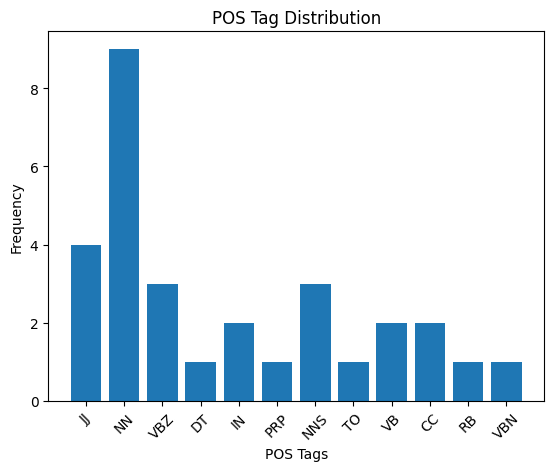

In [63]:
#POS Tag Distribution (Bar Plot)
pos_tags = pos_tag(para_tokens)
pos_counts = Counter(tag for word, tag in pos_tags)

plt.figure()
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution")
plt.xticks(rotation=45)
plt.show()


In [64]:
#Count Unique Lemmas
lemmatized_para = [lemmatizer.lemmatize(word) for word in para_tokens]
unique_lemmas = set(lemmatized_para)

print("Number of Unique Lemmas:", len(unique_lemmas))


Number of Unique Lemmas: 26


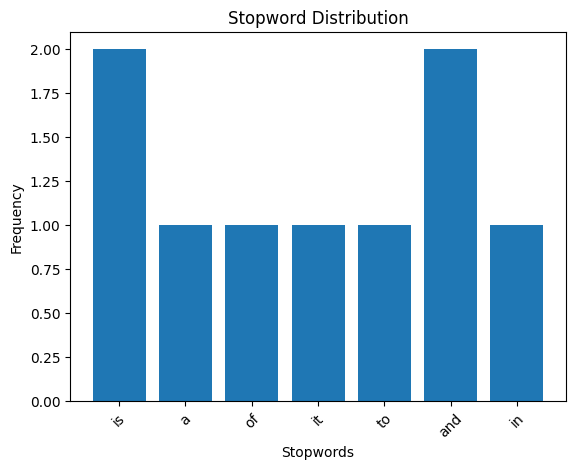

In [65]:
#Stopword Distribution (Bar Plot)
stopword_list = [word for word in para_tokens if word in stop_words]
stopword_freq = Counter(stopword_list)

plt.figure()
plt.bar(stopword_freq.keys(), stopword_freq.values())
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.title("Stopword Distribution")
plt.xticks(rotation=45)
plt.show()
